In [1]:
import pandas as pd

data = pd.read_csv('C:\\Users\\MuxtorovicH\\Desktop\\iris.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


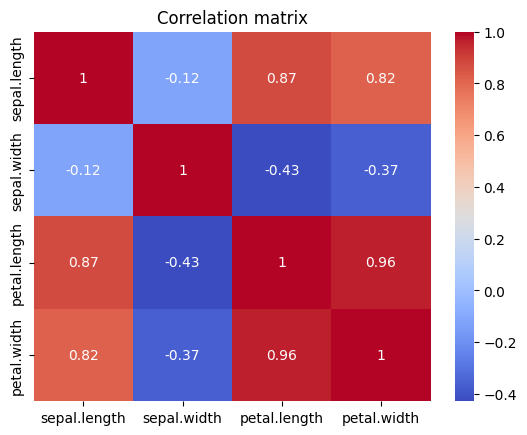

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.drop(columns=['variety'])
data_matrix = numeric_data.corr()
sns.heatmap(data_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

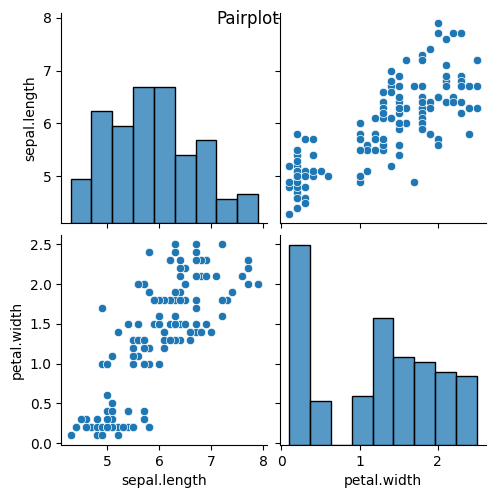

In [7]:
selected_feature = ['sepal.length', 'petal.width']
sns.pairplot(data[selected_feature])
plt.suptitle("Pairplot")
plt.show()

In [8]:
x = data[['sepal.length']]
y = data['sepal.width']
x.shape

(150, 1)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

model = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=55)
model.fit(x, y)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(r2)

0.15939753371656168
0.3002543079775752
-0.0001239566711201956


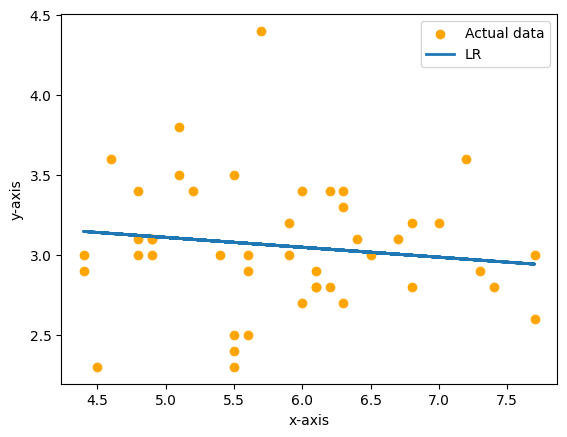

In [14]:
plt.scatter(x_test, y_test, c='orange', label="Actual data")
plt.plot(x_test, y_pred, linewidth=2, label='LR')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='best')
plt.show()

In [19]:
x = data[['sepal.length', 'petal.length']]
y = data['sepal.width']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

model = LinearRegression()

x_trains, x_test, y_trains, y_test = train_test_split(x, y, test_size=0.3, random_state=55)
model.fit(x_trains, y_trains)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(r2)



0.15314349905520105
0.32930376624507174
0.03911636119854345


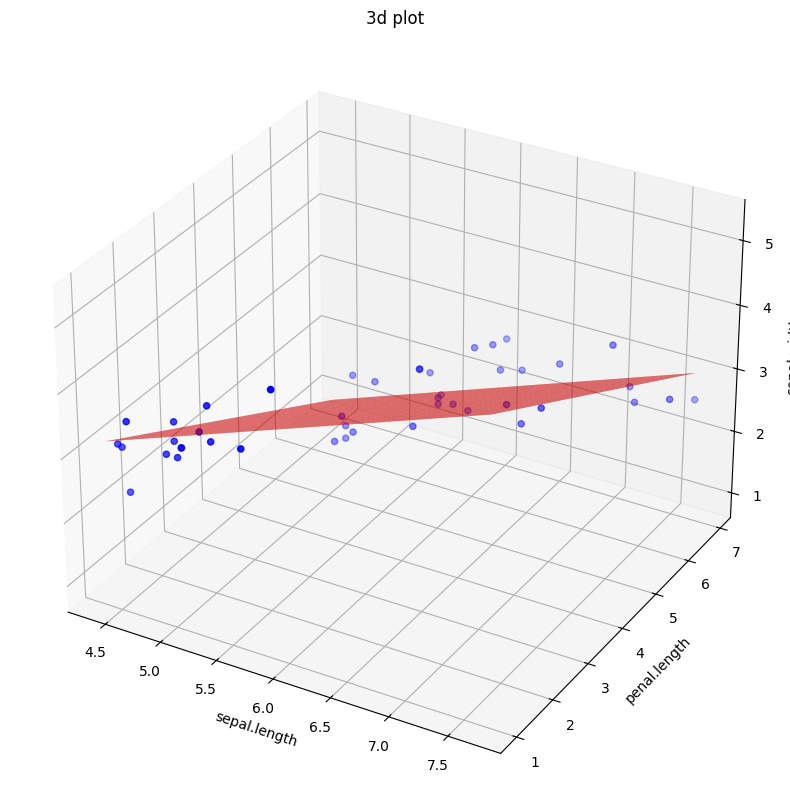

In [21]:
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test['sepal.length'], x_test['petal.length'], y_test, marker='o', color='blue', label='Actual data')
sl_range = np.linspace(x_test['sepal.length'].min(), x_test['sepal.length'].max(), 50)
pl_range = np.linspace(x_test['petal.length'].min(), x_test['petal.length'].max(), 50)
sl_range, pl_range = np.meshgrid(sl_range, pl_range)

sw_range = model.predict(pd.DataFrame({'sepal.length': sl_range.flatten(), 'petal.length': pl_range.flatten()}))
sw_range = sw_range.reshape(sl_range.shape)

ax.plot_surface(sl_range, pl_range, sw_range, color='red', alpha=0.7, label='Data')
ax.set_xlabel('sepal.length')
ax.set_ylabel('penal.length')
ax.set_zlabel('sepal.width')
plt.title("3d plot")
plt.show()